# Indice de Gini de propietarios

Fuente: 

Base de datos de la distribución de la propiedad rural histórica en el departamento de Córdoba, se dispone un informe estadístico para los años 2013 – 2020 discriminado para los municipios de Córdoba, con el detalle de rangos de tamaño predial, cantidad de predios, área, cantidad de propietarios y área por propietario.

IGAC (2020). Registro 1 y 2 de la base catastral rural. Catastro Distrital de Bogotá (2020). Información predial de la base catastral rural. Gobernación de Antioquia (2020). Registro básico y  complementario de la base catastral rural. Alcaldía de Medellín  (2020). Registro 1 de la base catastral rural. Alcaldía de Santiago de Cali (2020). Registro 1 de la base catastral rural. Alcaldía Distrital de Barranquilla (2020). Registro 1 y 2 de la base catastral rural. Área Metropolitana de Bucaramanga (2020). Registro 1 y 2 de la base catastral rural. Área Metropolitana Centro de Occidente (2020). Información sin asociación con la base catastral rural.

In [2]:
import pandas as pd

# Leer el archivo CSV en un DataFrame
archivo_csv = 'copia_13123_SEA_117031_estadisticas_cordoba_2013_2020.csv'  # Reemplaza con la ruta correcta a tu archivo CSV
datos = pd.read_csv(archivo_csv)

# Calcular las participaciones acumuladas para la superficie de predios y el número de propietarios
datos['Participacion_Acumulada_Superficie'] = datos.groupby(['Año', 'Municipio'])['área (Ha)'].cumsum() / datos.groupby(['Año', 'Municipio'])['área (Ha)'].transform('sum')
datos['Participacion_Acumulada_Propietarios'] = datos.groupby(['Año', 'Municipio'])['cantidad de propietarios'].cumsum() / datos.groupby(['Año', 'Municipio'])['cantidad de propietarios'].transform('sum')

# Calcular el índice de Gini de la tierra rural según la fórmula dada
datos['Gini_Tierra_Rural'] = 1 - (datos['Participacion_Acumulada_Superficie'] + datos['Participacion_Acumulada_Superficie'].shift(1)) * (datos['Participacion_Acumulada_Propietarios'] - datos['Participacion_Acumulada_Propietarios'].shift(1))

# Mostrar el DataFrame con los resultados
datos[['Año', 'Municipio', 'rango tamaño predial', 'Gini_Tierra_Rural']]


,Año,Municipio,rango tamaño predial,Gini_Tierra_Rural
0,2013,Ayapel,Ayapel,NaN
1,2013,Ayapel,"A1.Hasta 0,5 ha",0.967553
2,2013,Ayapel,"A2.Mayor a 0,5 ha - hasta 1 ha",0.988141
3,2013,Ayapel,"A3.Mayor a 1 ha - hasta 2,5 ha",0.974506
4,2013,Ayapel,"A4.Mayor a 2,5 ha - hasta 3 ha",0.994119
...,...,...,...,...
3285,2020,Valencia,D3.Mayor a 100 ha - hasta 200 ha,0.967107
3286,2020,Valencia,E1.Mayor a 200 ha - hasta 500 ha,0.975661
3287,2020,Valencia,E2.Mayor a 500 ha - hasta 1000 ha,0.996497
3288,2020,Valencia,E3.Mayor a 1000 ha - hasta 2000 ha,0.999154


# Gráfico de tendencia 2013-2020

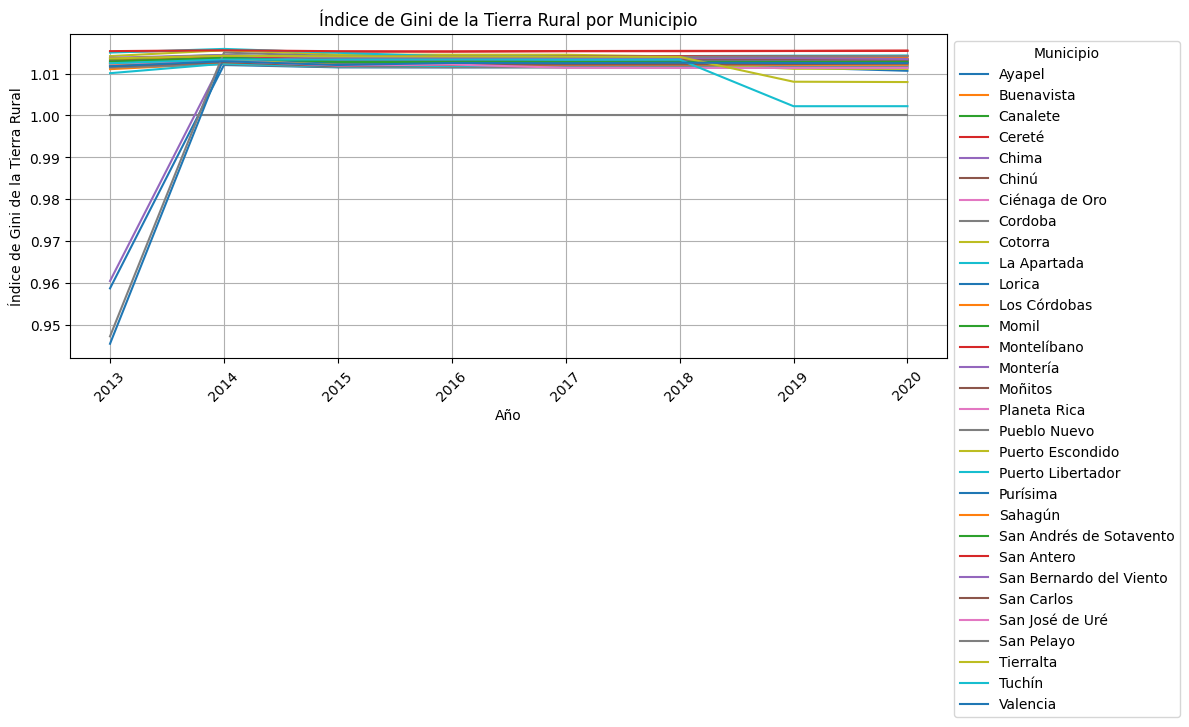

In [3]:
import matplotlib.pyplot as plt

# Agrupar los datos por año, municipio y calcular el promedio del Índice de Gini
gini_por_municipio = datos.groupby(['Año', 'Municipio'])['Gini_Tierra_Rural'].mean().unstack()

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar el Índice de Gini para cada municipio
for municipio in gini_por_municipio.columns:
    ax.plot(gini_por_municipio.index, gini_por_municipio[municipio], label=municipio)

# Configurar etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Índice de Gini de la Tierra Rural')
ax.set_title('Índice de Gini de la Tierra Rural por Municipio')
ax.legend(loc='upper left', bbox_to_anchor=(1,1), title='Municipio')
plt.grid(True)
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


# Selección municipios Bajo Sinú

In [6]:
municipios_interes = ['Chima', 'Momil', 'Purísima', 'Lorica','Cotorra']  # Reemplaza con tus municipios de interés

# Calcular el Índice de Gini corregido para cada fila en los datos
datos['Gini_Tierra_Rural_Corregido'] = 1 - ((datos['Participacion_Acumulada_Superficie'] + datos['Participacion_Acumulada_Superficie'].shift(1)).fillna(0) * 
                                             (datos['Participacion_Acumulada_Propietarios'] - datos['Participacion_Acumulada_Propietarios'].shift(1)).fillna(0))

# Filtrar los datos para incluir solo los municipios de interés
datos_municipios_interes = datos[datos['Municipio'].isin(municipios_interes)]

# Calcular el promedio del Índice de Gini corregido para cada municipio en el período de tiempo
gini_promedio_municipios_corregido = datos_municipios_interes.groupby('Municipio')['Gini_Tierra_Rural_Corregido'].mean()

# Crear una tabla resumen
tabla_gini_municipios_corregido = pd.DataFrame({'Municipio': gini_promedio_municipios_corregido.index, 'Índice de Gini Corregido': gini_promedio_municipios_corregido.values})

# Mostrar la tabla
tabla_gini_municipios_corregido




,Municipio,Índice de Gini Corregido
0,Chima,1.011876
1,Cotorra,1.014329
2,Lorica,1.012880
3,Momil,1.013579
4,Purísima,1.004929


# Corrección al error de datos > 1

In [7]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'copia_13123_SEA_117031_estadisticas_cordoba_2013_2020.csv'
data = pd.read_csv(file_path)

# Function to calculate Gini Index for land distribution
def calculate_gini_index(data):
    # Sort the data by area (Ha) per owner in ascending order
    data_sorted = data.sort_values(by='área(Ha)/propetario', ascending=True)

    # Calculate ijtPH (variable 1)
    data_sorted['ijtPH'] = data_sorted['área (Ha)'].cumsum() / data_sorted['área (Ha)'].sum()

    # Calculate ijtPA (variable 2)
    data_sorted['ijtPA'] = data_sorted['cantidad de propietarios'].cumsum() / data_sorted['cantidad de propietarios'].sum()

    # Calculate the terms within parentheses
    term1 = data_sorted['ijtPH'] + data_sorted['ijtPH'].shift(1, fill_value=0)
    term2 = data_sorted['ijtPA'] - data_sorted['ijtPA'].shift(1, fill_value=0)

    # Calculate Gini Index
    gini_index = 1 - (term1 * term2).sum()

    return gini_index

# Calculate Gini Index for each Municipio and year
gini_indices = data.groupby(['Año', 'Municipio']).apply(calculate_gini_index)

# Display the Gini Indices
gini_indices




Año   Municipio      
2013  Ayapel             0.094607
      Buenavista         0.114872
      Canalete           0.283144
      Cereté             0.478399
      Chima              0.184590
                           ...   
2020  San José de Uré    0.304313
      San Pelayo         0.183334
      Tierralta          0.282213
      Tuchín            -0.196509
      Valencia          -0.062048
Length: 248, dtype: float64

# COn grafico

Año   Municipio      
2013  Ayapel             0.094607
      Buenavista         0.114872
      Canalete           0.283144
      Cereté             0.478399
      Chima              0.184590
                           ...   
2020  San José de Uré    0.304313
      San Pelayo         0.183334
      Tierralta          0.282213
      Tuchín            -0.196509
      Valencia          -0.062048
Length: 248, dtype: float64

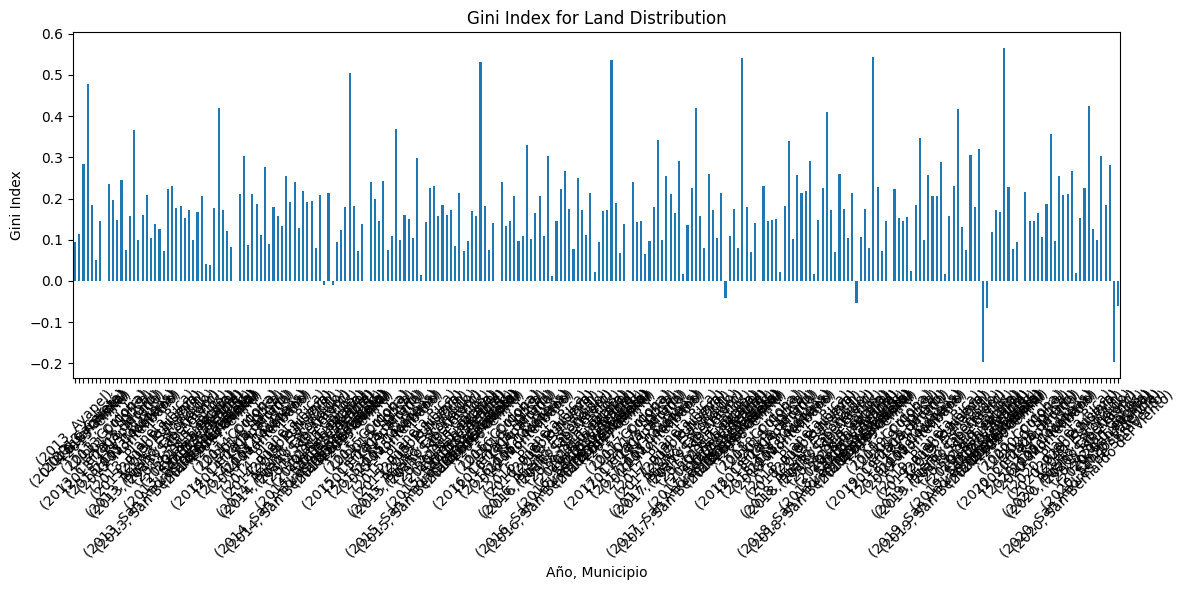

### Gini Index Table

|   Año | Municipio               |           0 |
|------:|:------------------------|------------:|
|  2013 | Ayapel                  |  0.0946074  |
|  2013 | Buenavista              |  0.114872   |
|  2013 | Canalete                |  0.283144   |
|  2013 | Cereté                  |  0.478399   |
|  2013 | Chima                   |  0.18459    |
|  2013 | Chinú                   |  0.0501862  |
|  2013 | Ciénaga de Oro          |  0.145499   |
|  2013 | Cordoba                 |  0          |
|  2013 | Cotorra                 |  0.235293   |
|  2013 | La Apartada             |  0.196349   |
|  2013 | Lorica                  |  0.14733    |
|  2013 | Los Córdobas            |  0.245492   |
|  2013 | Momil                   |  0.0751572  |
|  2013 | Montelíbano             |  0.157016   |
|  2013 | Montería                |  0.366556   |
|  2013 | Moñitos                 |  0.0994924  |
|  2013 | Planeta Rica            |  0.159438   |
|  2013 | Pueblo Nuevo            |  0.208698   |
|  2013 | Puerto Escondido        |  0.104548   |
|  2013 | Puerto Libertador       |  0.137076   |
|  2013 | Purísima                |  0.124855   |
|  2013 | Sahagún                 |  0.0731434  |
|  2013 | San Andrés de Sotavento |  0.223368   |
|  2013 | San Antero              |  0.23043    |
|  2013 | San Bernardo del Viento |  0.178172   |
|  2013 | San Carlos              |  0.18161    |
|  2013 | San José de Uré         |  0.15369    |
|  2013 | San Pelayo              |  0.1711     |
|  2013 | Tierralta               |  0.0984695  |
|  2013 | Tuchín                  |  0.167164   |
|  2013 | Valencia                |  0.206811   |
|  2014 | Ayapel                  |  0.0414464  |
|  2014 | Buenavista              |  0.0387738  |
|  2014 | Canalete                |  0.175963   |
|  2014 | Cereté                  |  0.419159   |
|  2014 | Chima                   |  0.171972   |
|  2014 | Chinú                   |  0.121133   |
|  2014 | Ciénaga de Oro          |  0.0834876  |
|  2014 | Cordoba                 |  0          |
|  2014 | Cotorra                 |  0.211703   |
|  2014 | La Apartada             |  0.303903   |
|  2014 | Lorica                  |  0.0871728  |
|  2014 | Los Córdobas            |  0.211855   |
|  2014 | Momil                   |  0.186374   |
|  2014 | Montelíbano             |  0.11211    |
|  2014 | Montería                |  0.275966   |
|  2014 | Moñitos                 |  0.0894838  |
|  2014 | Planeta Rica            |  0.178753   |
|  2014 | Pueblo Nuevo            |  0.15788    |
|  2014 | Puerto Escondido        |  0.134178   |
|  2014 | Puerto Libertador       |  0.25458    |
|  2014 | Purísima                |  0.19084    |
|  2014 | Sahagún                 |  0.239945   |
|  2014 | San Andrés de Sotavento |  0.129368   |
|  2014 | San Antero              |  0.217326   |
|  2014 | San Bernardo del Viento |  0.191087   |
|  2014 | San Carlos              |  0.194857   |
|  2014 | San José de Uré         |  0.0809992  |
|  2014 | San Pelayo              |  0.208367   |
|  2014 | Tierralta               | -0.00986703 |
|  2014 | Tuchín                  |  0.214338   |
|  2014 | Valencia                | -0.0107122  |
|  2015 | Ayapel                  |  0.0941226  |
|  2015 | Buenavista              |  0.124149   |
|  2015 | Canalete                |  0.178562   |
|  2015 | Cereté                  |  0.505342   |
|  2015 | Chima                   |  0.182371   |
|  2015 | Chinú                   |  0.0734587  |
|  2015 | Ciénaga de Oro          |  0.139188   |
|  2015 | Cordoba                 |  0          |
|  2015 | Cotorra                 |  0.239803   |
|  2015 | La Apartada             |  0.197957   |
|  2015 | Lorica                  |  0.144854   |
|  2015 | Los Córdobas            |  0.241648   |
|  2015 | Momil                   |  0.0752948  |
|  2015 | Montelíbano             |  0.108562   |
|  2015 | Montería                |  0.367658   |
|  2015 | Moñitos                 |  0.0997775  |
|  2015 | Planeta Rica            |  0.161107   |
|  2015 | Pueblo Nuevo            |  0.151367   |
|  2015 | Puerto Escondido        |  0.103495   |
|  2015 | Puerto Libertador       |  0.29909    |
|  2015 | Purísima                |  0.0137023  |
|  2015 | Sahagún                 |  0.143623   |
|  2015 | San Andrés de Sotavento |  0.225028   |
|  2015 | San Antero              |  0.2305     |
|  2015 | San Bernardo del Viento |  0.158715   |
|  2015 | San Carlos              |  0.185472   |
|  2015 | San José de Uré         |  0.160779   |
|  2015 | San Pelayo              |  0.172357   |
|  2015 | Tierralta               |  0.0856373  |
|  2015 | Tuchín                  |  0.214526   |
|  2015 | Valencia                |  0.0727054  |
|  2016 | Ayapel                  |  0.095682   |
|  2016 | Buenavista              |  0.168946   |
|  2016 | Canalete                |  0.157657   |
|  2016 | Cereté                  |  0.531276   |
|  2016 | Chima                   |  0.181668   |
|  2016 | Chinú                   |  0.0748556  |
|  2016 | Ciénaga de Oro          |  0.139721   |
|  2016 | Cordoba                 |  0          |
|  2016 | Cotorra                 |  0.239994   |
|  2016 | La Apartada             |  0.133567   |
|  2016 | Lorica                  |  0.145064   |
|  2016 | Los Córdobas            |  0.206557   |
|  2016 | Momil                   |  0.0972285  |
|  2016 | Montelíbano             |  0.108527   |
|  2016 | Montería                |  0.32898    |
|  2016 | Moñitos                 |  0.101936   |
|  2016 | Planeta Rica            |  0.164055   |
|  2016 | Pueblo Nuevo            |  0.205296   |
|  2016 | Puerto Escondido        |  0.10918    |
|  2016 | Puerto Libertador       |  0.302245   |
|  2016 | Purísima                |  0.0126834  |
|  2016 | Sahagún                 |  0.145238   |
|  2016 | San Andrés de Sotavento |  0.223266   |
|  2016 | San Antero              |  0.266786   |
|  2016 | San Bernardo del Viento |  0.175059   |
|  2016 | San Carlos              |  0.0766468  |
|  2016 | San José de Uré         |  0.250834   |
|  2016 | San Pelayo              |  0.173174   |
|  2016 | Tierralta               |  0.111343   |
|  2016 | Tuchín                  |  0.214604   |
|  2016 | Valencia                |  0.0211588  |
|  2017 | Ayapel                  |  0.0949635  |
|  2017 | Buenavista              |  0.168908   |
|  2017 | Canalete                |  0.171912   |
|  2017 | Cereté                  |  0.537442   |
|  2017 | Chima                   |  0.188811   |
|  2017 | Chinú                   |  0.0667587  |
|  2017 | Ciénaga de Oro          |  0.137287   |
|  2017 | Cordoba                 |  0          |
|  2017 | Cotorra                 |  0.240301   |
|  2017 | La Apartada             |  0.143068   |
|  2017 | Lorica                  |  0.145554   |
|  2017 | Los Córdobas            |  0.066152   |
|  2017 | Momil                   |  0.0963778  |
|  2017 | Montelíbano             |  0.178467   |
|  2017 | Montería                |  0.341816   |
|  2017 | Moñitos                 |  0.100019   |
|  2017 | Planeta Rica            |  0.2546     |
|  2017 | Pueblo Nuevo            |  0.211257   |
|  2017 | Puerto Escondido        |  0.165472   |
|  2017 | Puerto Libertador       |  0.291184   |
|  2017 | Purísima                |  0.0160812  |
|  2017 | Sahagún                 |  0.13563    |
|  2017 | San Andrés de Sotavento |  0.224768   |
|  2017 | San Antero              |  0.418888   |
|  2017 | San Bernardo del Viento |  0.157018   |
|  2017 | San Carlos              |  0.0807068  |
|  2017 | San José de Uré         |  0.258623   |
|  2017 | San Pelayo              |  0.17312    |
|  2017 | Tierralta               |  0.103781   |
|  2017 | Tuchín                  |  0.21457    |
|  2017 | Valencia                | -0.0408061  |
|  2018 | Ayapel                  |  0.108384   |
|  2018 | Buenavista              |  0.174111   |
|  2018 | Canalete                |  0.078684   |
|  2018 | Cereté                  |  0.539964   |
|  2018 | Chima                   |  0.179761   |
|  2018 | Chinú                   |  0.0694267  |
|  2018 | Ciénaga de Oro          |  0.141599   |
|  2018 | Cordoba                 |  0          |
|  2018 | Cotorra                 |  0.230095   |
|  2018 | La Apartada             |  0.146461   |
|  2018 | Lorica                  |  0.146899   |
|  2018 | Los Córdobas            |  0.151091   |
|  2018 | Momil                   |  0.0209631  |
|  2018 | Montelíbano             |  0.181769   |
|  2018 | Montería                |  0.339415   |
|  2018 | Moñitos                 |  0.101453   |
|  2018 | Planeta Rica            |  0.256015   |
|  2018 | Pueblo Nuevo            |  0.212483   |
|  2018 | Puerto Escondido        |  0.219397   |
|  2018 | Puerto Libertador       |  0.289878   |
|  2018 | Purísima                |  0.0164636  |
|  2018 | Sahagún                 |  0.148158   |
|  2018 | San Andrés de Sotavento |  0.226391   |
|  2018 | San Antero              |  0.411118   |
|  2018 | San Bernardo del Viento |  0.171143   |
|  2018 | San Carlos              |  0.0711863  |
|  2018 | San José de Uré         |  0.258469   |
|  2018 | San Pelayo              |  0.173834   |
|  2018 | Tierralta               |  0.104774   |
|  2018 | Tuchín                  |  0.214389   |
|  2018 | Valencia                | -0.0535189  |
|  2019 | Ayapel                  |  0.105379   |
|  2019 | Buenavista              |  0.174339   |
|  2019 | Canalete                |  0.0809951  |
|  2019 | Cereté                  |  0.542587   |
|  2019 | Chima                   |  0.227844   |
|  2019 | Chinú                   |  0.0716045  |
|  2019 | Ciénaga de Oro          |  0.145324   |
|  2019 | Cordoba                 |  0          |
|  2019 | Cotorra                 |  0.222997   |
|  2019 | La Apartada             |  0.152242   |
|  2019 | Lorica                  |  0.146294   |
|  2019 | Los Córdobas            |  0.155347   |
|  2019 | Momil                   |  0.0228359  |
|  2019 | Montelíbano             |  0.184178   |
|  2019 | Montería                |  0.346411   |
|  2019 | Moñitos                 |  0.0999118  |
|  2019 | Planeta Rica            |  0.256041   |
|  2019 | Pueblo Nuevo            |  0.205468   |
|  2019 | Puerto Escondido        |  0.207027   |
|  2019 | Puerto Libertador       |  0.289448   |
|  2019 | Purísima                |  0.0170386  |
|  2019 | Sahagún                 |  0.158155   |
|  2019 | San Andrés de Sotavento |  0.229262   |
|  2019 | San Antero              |  0.416833   |
|  2019 | San Bernardo del Viento |  0.130423   |
|  2019 | San Carlos              |  0.0739974  |
|  2019 | San José de Uré         |  0.305197   |
|  2019 | San Pelayo              |  0.179748   |
|  2019 | Tierralta               |  0.320792   |
|  2019 | Tuchín                  | -0.196983   |
|  2019 | Valencia                | -0.0651014  |
|  2020 | Ayapel                  |  0.119088   |
|  2020 | Buenavista              |  0.171132   |
|  2020 | Canalete                |  0.166405   |
|  2020 | Cereté                  |  0.565317   |
|  2020 | Chima                   |  0.228862   |
|  2020 | Chinú                   |  0.0765827  |
|  2020 | Ciénaga de Oro          |  0.0950798  |
|  2020 | Cordoba                 |  0          |
|  2020 | Cotorra                 |  0.216149   |
|  2020 | La Apartada             |  0.146325   |
|  2020 | Lorica                  |  0.146114   |
|  2020 | Los Córdobas            |  0.165255   |
|  2020 | Momil                   |  0.106511   |
|  2020 | Montelíbano             |  0.187203   |
|  2020 | Montería                |  0.357182   |
|  2020 | Moñitos                 |  0.0956584  |
|  2020 | Planeta Rica            |  0.25509    |
|  2020 | Pueblo Nuevo            |  0.208507   |
|  2020 | Puerto Escondido        |  0.212129   |
|  2020 | Puerto Libertador       |  0.266163   |
|  2020 | Purísima                |  0.0190138  |
|  2020 | Sahagún                 |  0.151805   |
|  2020 | San Andrés de Sotavento |  0.226337   |
|  2020 | San Antero              |  0.423509   |
|  2020 | San Bernardo del Viento |  0.125462   |
|  2020 | San Carlos              |  0.100041   |
|  2020 | San José de Uré         |  0.304313   |
|  2020 | San Pelayo              |  0.183334   |
|  2020 | Tierralta               |  0.282213   |
|  2020 | Tuchín                  | -0.196509   |
|  2020 | Valencia                | -0.0620478  |

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML

# Load the CSV file into a DataFrame
file_path = 'copia_13123_SEA_117031_estadisticas_cordoba_2013_2020.csv'
data = pd.read_csv(file_path)

# Function to calculate Gini Index for land distribution
def calculate_gini_index(data):
    # Sort the data by area (Ha) per owner in ascending order
    data_sorted = data.sort_values(by='área(Ha)/propetario', ascending=True)

    # Calculate ijtPH (variable 1)
    data_sorted['ijtPH'] = data_sorted['área (Ha)'].cumsum() / data_sorted['área (Ha)'].sum()

    # Calculate ijtPA (variable 2)
    data_sorted['ijtPA'] = data_sorted['cantidad de propietarios'].cumsum() / data_sorted['cantidad de propietarios'].sum()

    # Calculate the terms within parentheses
    term1 = data_sorted['ijtPH'] + data_sorted['ijtPH'].shift(1, fill_value=0)
    term2 = data_sorted['ijtPA'] - data_sorted['ijtPA'].shift(1, fill_value=0)

    # Calculate Gini Index
    gini_index = 1 - (term1 * term2).sum()

    return gini_index

# Calculate Gini Index for each Municipio and year
gini_indices = data.groupby(['Año', 'Municipio']).apply(calculate_gini_index)

# Display the Gini Indices
display(gini_indices)

# Plot the Gini Indices
plt.figure(figsize=(12, 6))
gini_indices.plot(kind='bar')
plt.xlabel('Año, Municipio')
plt.ylabel('Gini Index')
plt.title('Gini Index for Land Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Export the table in Markdown format
markdown_table = gini_indices.reset_index().to_markdown(index=False)
display(Markdown('### Gini Index Table\n\n' + markdown_table))

# Export button for the Markdown table
export_button = '''
<form action="data:text/markdown;charset=utf-8,{}" download="gini_index_table.md">
  <button type="submit">Export as Markdown</button>
</form>
'''.format(markdown_table)

display(HTML(export_button))


# Con grafico y promedio 2013-2020

Año     Municipio      
2013.0  Ayapel             0.155040
        Buenavista         0.130434
        Canalete           0.431998
        Cereté             0.732550
        Chima              0.222395
                             ...   
2020.0  San José de Uré    0.526679
        San Pelayo         0.425714
        Tierralta          0.525487
        Tuchín             0.437119
        Valencia          -0.001345
Length: 240, dtype: float64

Municipio
Ayapel                     0.150368
Buenavista                 0.218989
Canalete                   0.235362
Cereté                     0.780447
Chima                      0.267496
Chinú                      0.250861
Ciénaga de Oro             0.311365
Cotorra                    0.431603
La Apartada                0.517521
Lorica                     0.318515
Los Córdobas               0.378344
Momil                      0.192639
Montelíbano                0.431397
Montería                   0.468742
Moñitos                    0.369541
Planeta Rica               0.310221
Pueblo Nuevo               0.304709
Puerto Escondido           0.217168
Puerto Libertador          0.408935
Purísima                   0.053833
Sahagún                    0.317850
San Andrés de Sotavento    0.361022
San Antero                 0.691747
San Bernardo del Viento    0.465841
San Carlos                 0.264511
San José de Uré            0.381397
San Pelayo                 0.420972
Tierralta         

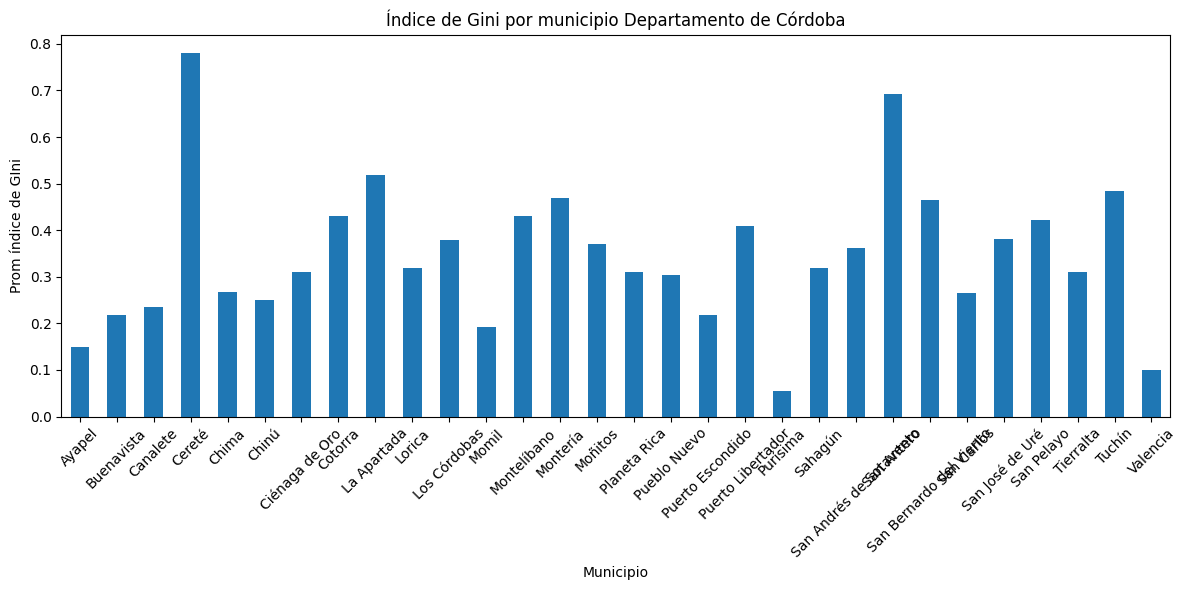

### Índice de Gini por municipio Departamento de Córdoba (promedio 2013-2020)

| Municipio               |         0 |
|:------------------------|----------:|
| Ayapel                  | 0.150368  |
| Buenavista              | 0.218989  |
| Canalete                | 0.235362  |
| Cereté                  | 0.780447  |
| Chima                   | 0.267496  |
| Chinú                   | 0.250861  |
| Ciénaga de Oro          | 0.311365  |
| Cotorra                 | 0.431603  |
| La Apartada             | 0.517521  |
| Lorica                  | 0.318515  |
| Los Córdobas            | 0.378344  |
| Momil                   | 0.192639  |
| Montelíbano             | 0.431397  |
| Montería                | 0.468742  |
| Moñitos                 | 0.369541  |
| Planeta Rica            | 0.310221  |
| Pueblo Nuevo            | 0.304709  |
| Puerto Escondido        | 0.217168  |
| Puerto Libertador       | 0.408935  |
| Purísima                | 0.0538328 |
| Sahagún                 | 0.31785   |
| San Andrés de Sotavento | 0.361022  |
| San Antero              | 0.691747  |
| San Bernardo del Viento | 0.465841  |
| San Carlos              | 0.264511  |
| San José de Uré         | 0.381397  |
| San Pelayo              | 0.420972  |
| Tierralta               | 0.310997  |
| Tuchín                  | 0.484477  |
| Valencia                | 0.100974  |

### Índice de Gini por municipio Departamento de Córdoba (promedio 2013-2020)



Municipio
Ayapel                     0.150368
Buenavista                 0.218989
Canalete                   0.235362
Cereté                     0.780447
Chima                      0.267496
Chinú                      0.250861
Ciénaga de Oro             0.311365
Cotorra                    0.431603
La Apartada                0.517521
Lorica                     0.318515
Los Córdobas               0.378344
Momil                      0.192639
Montelíbano                0.431397
Montería                   0.468742
Moñitos                    0.369541
Planeta Rica               0.310221
Pueblo Nuevo               0.304709
Puerto Escondido           0.217168
Puerto Libertador          0.408935
Purísima                   0.053833
Sahagún                    0.317850
San Andrés de Sotavento    0.361022
San Antero                 0.691747
San Bernardo del Viento    0.465841
San Carlos                 0.264511
San José de Uré            0.381397
San Pelayo                 0.420972
Tierralta         

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML

# Load the CSV file into a DataFrame
file_path = 'igac_prop_predios_cordoba_2013-2020.csv'
data = pd.read_csv(file_path)

# Function to calculate Gini Index for land distribution
def calculate_gini_index(data):
    # Sort the data by area (Ha) per owner in ascending order
    data_sorted = data.sort_values(by='área(Ha)/propetario', ascending=True)

    # Calculate ijtPH (variable 1)
    data_sorted['ijtPH'] = data_sorted['área (Ha)'].cumsum() / data_sorted['área (Ha)'].sum()

    # Calculate ijtPA (variable 2)
    data_sorted['ijtPA'] = data_sorted['cantidad de propietarios'].cumsum() / data_sorted['cantidad de propietarios'].sum()

    # Calculate the terms within parentheses
    term1 = data_sorted['ijtPH'] + data_sorted['ijtPH'].shift(1, fill_value=0)
    term2 = data_sorted['ijtPA'] - data_sorted['ijtPA'].shift(1, fill_value=0)

    # Calculate Gini Index
    gini_index = 1 - (term1 * term2).sum()

    return gini_index

# Calculate Gini Index for each Municipio and year
gini_indices = data.groupby(['Año', 'Municipio']).apply(calculate_gini_index)

# Display the Gini Indices
display(gini_indices)

# Calculate the average Gini Index for each Municipio across all years
average_gini_by_municipio = gini_indices.groupby('Municipio').mean()

# Display the average Gini Index for each Municipio
display(average_gini_by_municipio)

# Plot the average Gini Index for each Municipio
plt.figure(figsize=(12, 6))
average_gini_by_municipio.plot(kind='bar')
plt.xlabel('Municipio')
plt.ylabel('Prom índice de GIni')
plt.title('Índice de Gini por municipio Departamento de Córdoba')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Export the table in Markdown format for the average Gini Index
average_gini_markdown_table = average_gini_by_municipio.reset_index().to_markdown(index=False)
display(Markdown('### Índice de Gini por municipio Departamento de Córdoba (promedio 2013-2020)\n\n' + average_gini_markdown_table))

# Export button for the Markdown table
average_gini_export_button = '''
<form action="data:text/markdown;charset=utf-8,{}" download="average_gini_index_table.md">
  <button type="submit">Export Average Gini as Markdown</button>
</form>
'''.format(average_gini_markdown_table)

display(HTML(average_gini_export_button))

# Exporta el DataFrame a un archivo CSV
average_gini_csv_table_path = 'average_gini_index_table.csv'
average_gini_by_municipio.reset_index().to_csv(average_gini_csv_table_path, index=False)

# Muestra la tabla como Markdown
display(Markdown('### Índice de Gini por municipio Departamento de Córdoba (promedio 2013-2020)\n\n'))
display(average_gini_by_municipio)

# Exporta un botón para descargar la tabla en formato CSV
average_gini_export_button = '''
<form action="{}" method="get" target="_blank">
  <button type="submit">Exportar Índice de Gini promedio como CSV</button>
</form>
'''.format(average_gini_csv_table_path)

display(HTML(average_gini_export_button))

# Otra versión más metódica después de verificar mal cálculo

,Municipio,Índice de Gini
0,Ayapel,1.0
1,Buenavista,1.0
2,Canalete,1.0
3,Cereté,1.0
4,Chima,1.0
5,Chinú,1.0
6,Ciénaga de Oro,1.0
7,Cotorra,1.0
8,La Apartada,1.0
9,Lorica,1.0


<Figure size 1200x600 with 0 Axes>

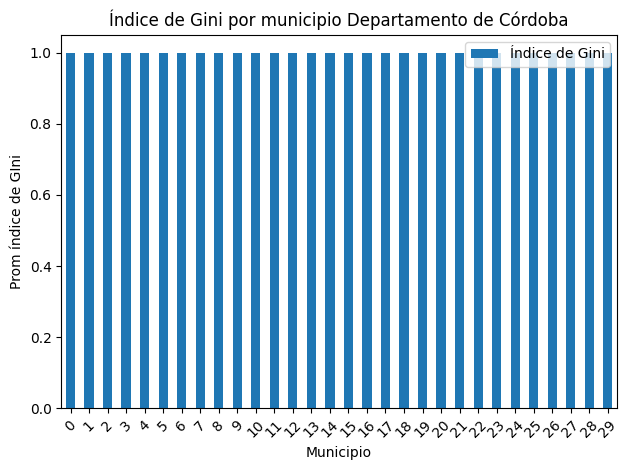

### Índice de Gini por municipio Departamento de Córdoba (promedio 2013-2020)

|   index | Municipio               |   Índice de Gini |
|--------:|:------------------------|-----------------:|
|       0 | Ayapel                  |                1 |
|       1 | Buenavista              |                1 |
|       2 | Canalete                |                1 |
|       3 | Cereté                  |                1 |
|       4 | Chima                   |                1 |
|       5 | Chinú                   |                1 |
|       6 | Ciénaga de Oro          |                1 |
|       7 | Cotorra                 |                1 |
|       8 | La Apartada             |                1 |
|       9 | Lorica                  |                1 |
|      10 | Los Córdobas            |                1 |
|      11 | Momil                   |                1 |
|      12 | Montelíbano             |                1 |
|      13 | Montería                |                1 |
|      14 | Moñitos                 |                1 |
|      15 | Planeta Rica            |                1 |
|      16 | Pueblo Nuevo            |                1 |
|      17 | Puerto Escondido        |                1 |
|      18 | Puerto Libertador       |                1 |
|      19 | Purísima                |                1 |
|      20 | Sahagún                 |                1 |
|      21 | San Andrés de Sotavento |                1 |
|      22 | San Antero              |                1 |
|      23 | San Bernardo del Viento |                1 |
|      24 | San Carlos              |                1 |
|      25 | San José de Uré         |                1 |
|      26 | San Pelayo              |                1 |
|      27 | Tierralta               |                1 |
|      28 | Tuchín                  |                1 |
|      29 | Valencia                |                1 |

### Índice de Gini por municipio Departamento de Córdoba (promedio 2013-2020)



,Municipio,Índice de Gini
0,Ayapel,1.0
1,Buenavista,1.0
2,Canalete,1.0
3,Cereté,1.0
4,Chima,1.0
5,Chinú,1.0
6,Ciénaga de Oro,1.0
7,Cotorra,1.0
8,La Apartada,1.0
9,Lorica,1.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML

# Load the CSV file into a DataFrame
file_path = 'igac_prop_predios_cordoba_2013-2020.csv'
data = pd.read_csv(file_path)

df = pd.DataFrame(data, columns=['Año', 'Municipio', 'Rango Tamaño Predial', 'Cantidad de Predios', 'Área (Ha)', 'Cantidad de Propietarios', 'Área (Ha)/Propietario'])

# Calculate the normalized cumulative proportions for both areas and owners
df['Área Acumulada Normalizada'] = df.groupby(['Año', 'Municipio'])['Área (Ha)'].transform(lambda x: x / x.sum())
df['Propietarios Acumulados Normalizados'] = df.groupby(['Año', 'Municipio'])['Cantidad de Propietarios'].transform(lambda x: x / x.sum())

# Calculate the absolute differences between the normalized cumulative proportions
df['Diferencia Absoluta'] = abs(df['Área Acumulada Normalizada'] - df['Propietarios Acumulados Normalizados'])

# Calculate the Gini Index for each year and municipality
df['Índice de Gini'] = 1 - 2 * df.groupby(['Año', 'Municipio'])['Diferencia Absoluta'].transform('sum')

# Calculate the average Gini Index for each municipality
average_gini_by_municipio = df.groupby('Municipio')['Índice de Gini'].mean().reset_index()

# Display the average Gini Index for each Municipio
display(average_gini_by_municipio)

# Plot the average Gini Index for each Municipio
plt.figure(figsize=(12, 6))
average_gini_by_municipio.plot(kind='bar')
plt.xlabel('Municipio')
plt.ylabel('Prom índice de GIni')
plt.title('Índice de Gini por municipio Departamento de Córdoba')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Export the table in Markdown format for the average Gini Index
average_gini_markdown_table = average_gini_by_municipio.reset_index().to_markdown(index=False)
display(Markdown('### Índice de Gini por municipio Departamento de Córdoba (promedio 2013-2020)\n\n' + average_gini_markdown_table))

# Export button for the Markdown table
average_gini_export_button = '''
<form action="data:text/markdown;charset=utf-8,{}" download="average_gini_index_table.md">
  <button type="submit">Export Average Gini as Markdown</button>
</form>
'''.format(average_gini_markdown_table)

display(HTML(average_gini_export_button))

# Exporta el DataFrame a un archivo CSV
average_gini_csv_table_path = 'average_gini_index_table.csv'
average_gini_by_municipio.reset_index().to_csv(average_gini_csv_table_path, index=False)

# Muestra la tabla como Markdown
display(Markdown('### Índice de Gini por municipio Departamento de Córdoba (promedio 2013-2020)\n\n'))
display(average_gini_by_municipio)

# Exporta un botón para descargar la tabla en formato CSV
average_gini_export_button = '''
<form action="{}" method="get" target="_blank">
  <button type="submit">Exportar Índice de Gini promedio como CSV</button>
</form>
'''.format(average_gini_csv_table_path)

display(HTML(average_gini_export_button))


# Otra prueba

In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'cotorra.csv'
data = pd.read_csv(file_path)

# Create a DataFrame from the provided data
df = pd.DataFrame(data)

# Calculate the normalized cumulative proportions for areas and owners
df['Área Acumulada Normalizada'] = df.groupby(['Año', 'Municipio'])['área(Ha)'].transform(lambda x: x / x.sum())
df['Propietarios Acumulados Normalizados'] = df.groupby(['Año', 'Municipio'])['cantidaddepropietarios'].transform(lambda x: x / x.sum())

# Calculate the absolute differences between the normalized cumulative proportions
df['Diferencia Absoluta'] = abs(df['Área Acumulada Normalizada'] - df['Propietarios Acumulados Normalizados'])

# Calculate the Gini Index for each year and municipality
df['Índice de Gini'] = 1 - 2 * df.groupby(['Año', 'Municipio'])['Diferencia Absoluta'].transform('sum')

# Calculate the average Gini Index for each year
average_gini_by_year = df.groupby('Año')['Índice de Gini'].mean().reset_index()

# Display the calculated Gini Index for each year and the average for each year
print("Índice de Gini por año para el municipio de Momil:")
print(average_gini_by_year)


Índice de Gini por año para el municipio de Momil:
    Año  Índice de Gini
0  2013       -0.831158
1  2014       -1.055509
2  2015       -0.867412
3  2016       -0.861257
4  2017       -0.864522
5  2018       -0.801183
6  2019       -0.766104
7  2020       -0.711536


# Nueva versión pos taller Erre

/tmp/ipykernel_3912/2836146544.py:15: RuntimeWarning: invalid value encountered in scalar divide
  gini_indices = df.groupby(['Año', 'Municipio']).apply(lambda x: (x['Área Promedio Predio'] * x['Cantidad de Propietarios']).sum() / (2 * x['Área Promedio Predio'].sum()) - 0.5).reset_index(name='Índice de Gini')


,Municipio,Índice de Gini
0,Ayapel,NaN
1,Buenavista,NaN
2,Canalete,NaN
3,Cereté,NaN
4,Chima,NaN
5,Chinú,NaN
6,Ciénaga de Oro,NaN
7,Cotorra,NaN
8,La Apartada,NaN
9,Lorica,NaN


<Figure size 1200x600 with 0 Axes>

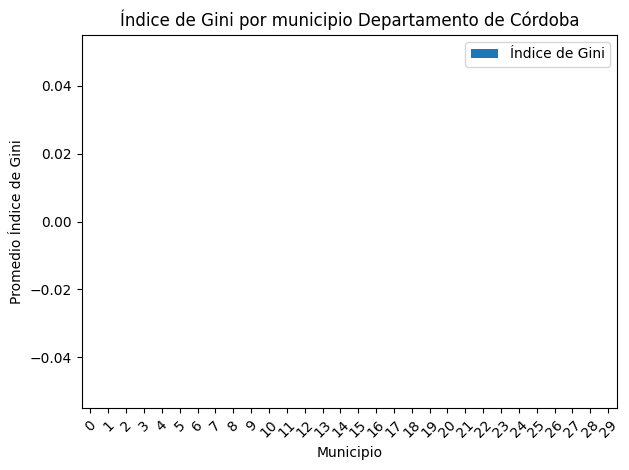

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML

# Load the CSV file into a DataFrame
file_path = 'igac_prop_predios_cordoba_2013-2020.csv'
data = pd.read_csv(file_path)

df = pd.DataFrame(data, columns=['Año', 'Municipio', 'Rango Tamaño Predial', 'Cantidad de Predios', 'Área (Ha)', 'Cantidad de Propietarios'])

# Calculate the average area per property
df['Área Promedio Predio'] = df['Área (Ha)'] / df['Cantidad de Predios']

# Calculate the Gini Index for each year and municipality
gini_indices = df.groupby(['Año', 'Municipio']).apply(lambda x: (x['Área Promedio Predio'] * x['Cantidad de Propietarios']).sum() / (2 * x['Área Promedio Predio'].sum()) - 0.5).reset_index(name='Índice de Gini')

# Calculate the average Gini Index for each municipality
average_gini_by_municipio = gini_indices.groupby('Municipio')['Índice de Gini'].mean().reset_index()

# Display the average Gini Index for each Municipio
display(average_gini_by_municipio)

# Plot the average Gini Index for each Municipio
plt.figure(figsize=(12, 6))
average_gini_by_municipio.plot(kind='bar')
plt.xlabel('Municipio')
plt.ylabel('Promedio Índice de Gini')
plt.title('Índice de Gini por municipio Departamento de Córdoba')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Para resolver error en el anterior

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML

# Load the CSV file into a DataFrame
file_path = 'igac_prop_predios_cordoba_2013-2020.csv'
data = pd.read_csv(file_path)

df = pd.DataFrame(data, columns=['Año', 'Municipio', 'Rango Tamaño Predial', 'Cantidad de Predios', 'Área (Ha)', 'Cantidad de Propietarios', 'área(Ha)/propetario'])

# Convert the 'área(Ha)/propetario' column to numeric
df['área(Ha)/propetario'] = pd.to_numeric(df['área(Ha)/propetario'], errors='coerce')

# Function to calculate Gini
def calculate_gini(group):
    total_area = group['Área (Ha)'].sum()
    total_property = group['Cantidad de Propietarios'].sum()
    group = group.sort_values(by='área(Ha)/propetario')
    cumulative_property = group['Cantidad de Propietarios'].cumsum()
    cumulative_area = group['Área (Ha)'].cumsum()
    
    # Calculate the area under the Lorenz curve
    AUC = ((cumulative_property / total_property) * cumulative_area).sum() / (total_area + 1e-10) * 0.5
    
    # Calculate the Gini Index
    G = 1 - 2 * AUC
    return G

# Calculate Gini for each combination of year, municipality, and size range
gini_indices = df.groupby(['Año', 'Municipio', 'Rango Tamaño Predial']).apply(calculate_gini).reset_index()

# Calculate the average Gini Index for each municipality across all years
average_gini_by_municipio = gini_indices.groupby(['Municipio', 'Rango Tamaño Predial'])['Índice de Gini'].mean().reset_index()

# Display the average Gini Index for each Municipio
display(average_gini_by_municipio)

# Plot the average Gini Index for each Municipio
plt.figure(figsize=(12, 6))
average_gini_by_municipio.plot(kind='bar', x='Municipio', y='Índice de Gini', hue='Rango Tamaño Predial')
plt.xlabel('Municipio')
plt.ylabel('Promedio Índice de Gini')
plt.title('Índice de Gini por municipio Departamento de Córdoba')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



ValueError: cannot insert Rango Tamaño Predial, already exists